# $\text{3.1 Synthetic numerical example}$

Importing libraries

In [ ]:
import numpy as np 
# import cupy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
from sklearn.decomposition import TruncatedSVD
import cvxpy as cp

Creating synthetic inliers: ***A***, outliers: ***B***

Creating synthetic inliers: ***A***, outliers: ***B***

In [ ]:
# Create random matrices A: inlier
A =     np.random.rand(20, 200);                   #print(f'>> A{A.shape}:\n', A)
# Create random matrices B: outlier
B = 100*np.random.rand(20,  50);                   #print(f'>> B{B.shape}:\n', B)
# Create random matrices N: noise
N = 0.9*np.random.rand(20, 200);

A.shape, B.shape, N.shape

Creating dataset ***D*** from **A**, ***B*** and ***N*** \
$D = [B (A+N)]T$ \
To simplify the exposition and notation, it is assumed without loss of generality that $T$ in Data Model 1 is the identity matrix, i.e, $D = [B A]$

>> D(20, 250):



<Axes: >

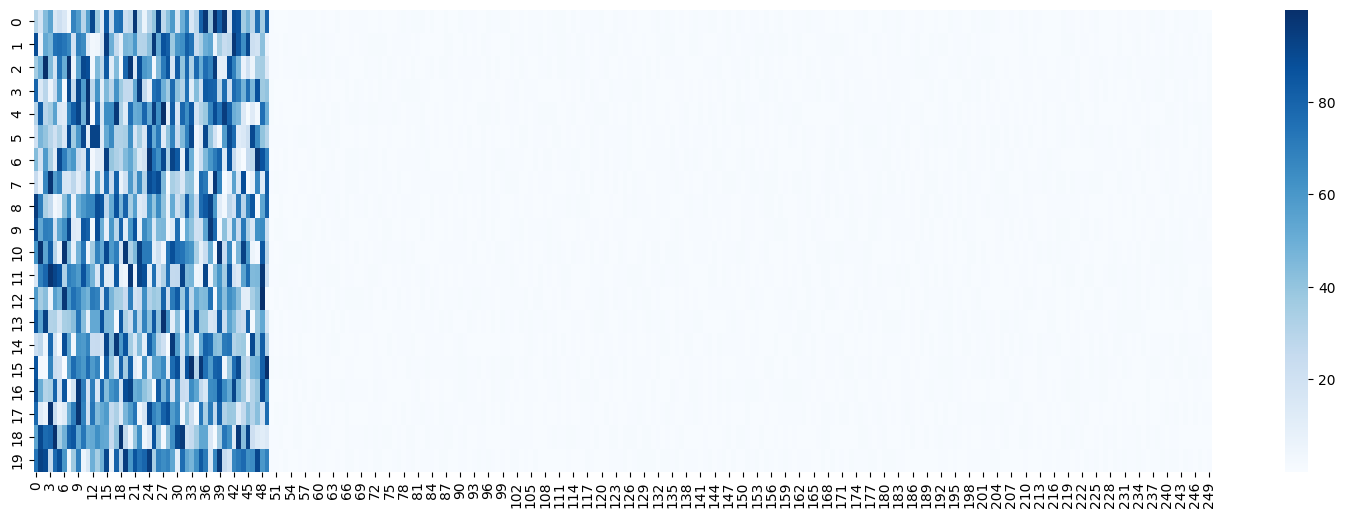

In [77]:
# Concatenate B(A+N)
D = np.hstack((B, A));   print(f'>> D{D.shape}:\n')

# plotting the heatmap 
plt.figure(figsize=(19,6))
sn.heatmap(data = D, cmap='Blues')

Create a permutation matrix T

>> D(20, 250):



<Axes: >

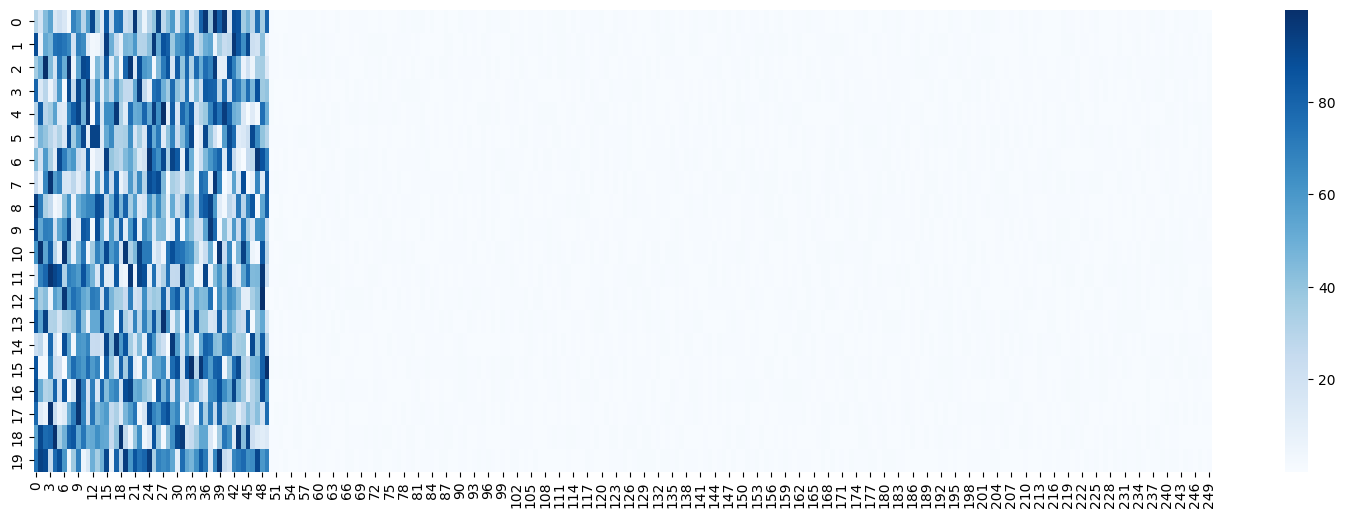

In [78]:
T = np.eye(D.shape[1])
D = D @ T;                           print(f'>> D{D.shape}:\n')

plt.figure(figsize=(19,6))
sn.heatmap(data = D, cmap="Blues")

Step 1: Data Preprocessing

In [79]:
# svd = TruncatedSVD(n_components=250);         # print('\n>> svd object:\n', svd)
# Q = svd.fit_transform(D);                     # print('\n>> Q:\n', Q)
# D_new = Q.T @ D;                               # print('\n>> D_new (Q.T @ D):\n', D_new, D_new.shape)

# Normalizing l-2 norm (opti`onal based on requirement)
# column_norms = np.linalg.norm(D_new, axis=0); #print('\n>> column_norms:\n', column_norms)
# D_new = D_new/column_norms;                   #print('\n>> D_new:\n', D_new, D_new.shape)

# print(f'>> D_new{D_new.shape}')

In [80]:
import cvxpy as cp # ADMM solver

# Assuming D_new is your data matrix after preprocessing (2,3)
D_new = D
M1, M2 = D_new.shape;                                             #print('>> M1, M2:\n', D_new.shape)
# This should be the number of non-zero singular values
rd = M1;                                                          #print('\n>> rd:\n', M1)

# Variable to be solved for
C = cp.Variable((rd, M2));                                        #print('\n>> C:\n', C)

# Defining the constraints
constraints = [cp.diag(C.T @ D_new) == 1];                        #print('\n>> constraints:\n', constraints)

# Defining the objective function
objective = cp.Minimize(cp.norm(C.T @ D_new, 1));                 #print('\n>> objective:\n', objective)

# Defining the problem
problem = cp.Problem(objective, constraints);                     #print('\n>> problem:\n', problem)

# Solving the problem using ADMM solver
# Solving the problem using SCS solver (which uses ADMM)
problem.solve(solver=cp.SCS, verbose=True)
# problem.solve(solver=cp.ADMM)

                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) Mar 28 06:23:23 PM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 28 06:23:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 28 06:23:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 28 06:23:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 28 06:23:23 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 28 06:23:23 PM: Compiling problem (target solver=SCS).
(CV

In [86]:
print(f"optimal objective value: {objective.value}")
C_star = C.value;     #print('\n>> C_star:\n', C.value)
print('C_star shape:', C_star.shape)
np.savetxt("c_star", C_star , delimiter=',')

optimal objective value: 2524.7039724015613
C_star shape: (20, 250)


Optimal values for C

In [87]:
C_star = np.loadtxt("./c_star", delimiter=",")
C_star

array([[-2.57986536e-03, -3.69417968e-04,  2.96289467e-03, ...,
        -2.32810001e-01, -1.06541137e-02, -1.82019962e-01],
       [ 1.60229979e-03, -2.72433792e-03,  1.28887435e-03, ...,
        -2.39163853e-01, -5.27729947e-02,  2.60440636e-01],
       [-3.41775899e-03, -6.38466042e-06,  2.15498934e-03, ...,
        -2.51636566e-01, -6.68947956e-03,  4.99237723e-02],
       ...,
       [ 1.97815341e-03,  7.07810187e-04, -5.47114834e-03, ...,
        -1.08573016e-01,  1.73454165e-01, -5.16850308e-03],
       [-4.73708896e-05,  1.47950261e-03,  1.74376678e-03, ...,
        -9.19941078e-03, -5.13425670e-01, -1.61894236e-01],
       [ 1.62664299e-04,  4.49794187e-03, -1.99723241e-03, ...,
         7.28258264e-02, -7.30656940e-02, -2.89103774e-01]])

Computing the innovation values

>> x:
 [0.00386412 0.00379885 0.00370886 0.00291363 0.00331189 0.00370385
 0.00324091 0.00376926 0.0035438  0.00361623 0.00414158 0.00373388
 0.00326054 0.00313076 0.0036565  0.00365048 0.0042067  0.00368842
 0.00315635 0.00370585 0.00388021 0.00332022 0.00312206 0.00320804
 0.00305823 0.00310101 0.00373275 0.00366836 0.00337756 0.00353053
 0.00348819 0.00361138 0.00353995 0.00315596 0.0039144  0.00342874
 0.00384856 0.00361549 0.00365845 0.00358852 0.00343275 0.00393085
 0.00354127 0.00331936 0.00345379 0.00342071 0.00326485 0.00324833
 0.00362269 0.00376539 0.20598248 0.2021674  0.29066661 0.28875961
 0.23148099 0.18583446 0.23460309 0.27107107 0.26180087 0.28139158
 0.25583243 0.24578772 0.19690733 0.20294141 0.25171195 0.22803747
 0.16665816 0.2976982  0.17728706 0.31051072 0.16584587 0.2356252
 0.18346968 0.2991198  0.19041165 0.24171977 0.31108807 0.25191481
 0.25435808 0.49263813 0.30708555 0.18970962 0.20231259 0.19163629
 0.20283831 0.36777841 0.24076769 0.28863868 0.21226718 

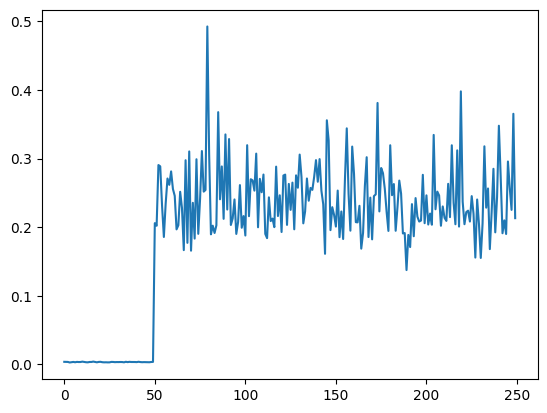

In [100]:
x = 1 / np.linalg.norm(D_new.T @ C_star, axis=1);  print('>> x:\n', x)
print(f'>> x{x.shape}')
plt.plot(x)

Text(0.5, 1.0, 'Innovation Values, p=1')

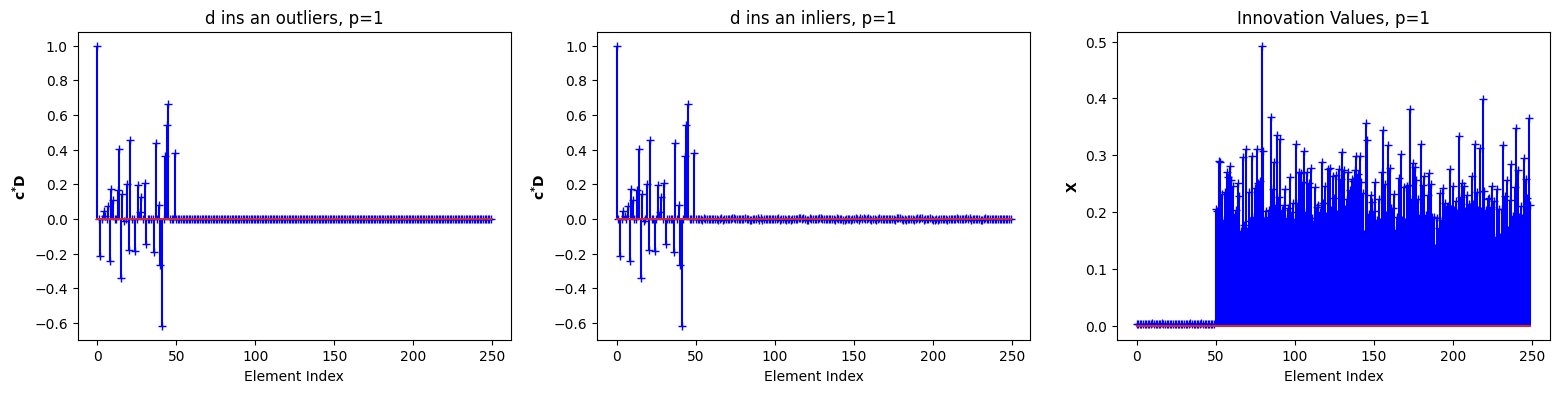

In [99]:
plt.figure(figsize=(19,4))

plt.subplot(1,3,1)
plt.stem(np.arange(0,250), np.hstack([(C_star.T @ D_new)[0,:50], np.zeros(200)]), linefmt ='blue', markerfmt ='+')
plt.xlabel('Element Index'); plt.ylabel(r'$\mathbf{c^{*}D}$'); plt.title("d ins an outliers, p=1")

plt.subplot(1,3,2)
plt.stem(np.arange(0,250), (C_star.T @ D_new)[0,:], linefmt ='blue', markerfmt ='+')
plt.xlabel('Element Index'); plt.ylabel(r'$\mathbf{c^{*}D}$'); plt.title("d ins an inliers, p=1")

plt.subplot(1,3,3)
plt.stem(np.arange(0,250), x, linefmt ='blue', markerfmt ='+')
plt.xlabel('Element Index'); plt.ylabel(r'$\mathbf{X}$'); plt.title("Innovation Values, p=1")

In [ ]:
D_new.shape

In [ ]:
# importing the modules 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 

# generating 2-D 10x10 matrix of random numbers 
# from 1 to 100 
data = D_new
print("The data to be plotted:\n") 
print(data) 

# plotting the heatmap 
plt.figure(figsize=(19,10))
hm = sn.heatmap(data = data) 


# displaying the plotted heatmap 
plt.show()
